In [11]:
from SourceCode.FEM_elliptic_eq import FEM_elliptic_eq2D, FEM_elliptic_eq1D
from SourceCode.Domains import Domain2DRectangle, Domain1D
from SourceCode.utilities import get_func

from math import e, pi
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def plot_2d_function(
    x: np.array,
    y: np.array,
    f_value: np.array
) -> None:
    fig = plt.figure(figsize=(9, 7))
    ax = fig.add_subplot(111, projection="3d")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("f(x,y)")
    ax.grid(True, which="both")
    ax.plot_surface(
        x, y, f_value, color="lime", label='func', linewidth=5
    )
    plt.show()

# № 1

$$u_{xx}+u_{yy}=-1$$
$$ u(-1,y)=u(1,y)=u(x,-1)=u(x,1=0) $$

In [27]:
def analyt_func(x,y):
    n: int = 10
    total_s: float = 0
    for i in range(1,n,2):
        for j in range(1,n,2):
            total_s += (-1)**((i+j)//2-1)/(i*j*(i*i+j*j))*np.cos(i*pi/2*x)*np.cos(j*pi/2*y)
    total_s = total_s * (8/(pi*pi))**2
    return total_s

left_part = lambda x, y, f1, f2: (get_func(f1,'x1',1)(x,y)*get_func(f2,'x1',1)(x,y)
                               +  get_func(f1,'x2',1)(x,y)*get_func(f2,'x2',1)(x,y))
right_part = lambda x, y: 1
dirichle_cond = lambda x, y:  0
xl = -1
xr = 1
yl = -1
yr = 1
x_points = 12
y_points = 12
domain = Domain2DRectangle(x_points, y_points, xl, xr, yl, yr)
fem_obj = FEM_elliptic_eq2D(domain,
                            left_part,
                            right_part,
                            dirichle_cond)
appr_sol = fem_obj.get_solution()
x, y = domain.get_domain()
analyt_sol = analyt_func(x, y)
error = np.max(np.abs(appr_sol - analyt_sol))
print(error)

count points: 144 
count finite elements: 121 
0.0018914806879916646


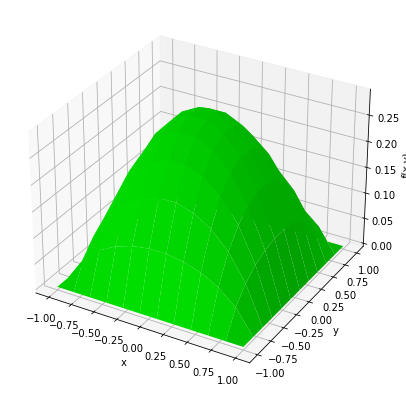

In [28]:
plot_2d_function(x, y, appr_sol)

# №2

$$ u_{xx} + u_{yy} = 0$$
$$ u(x,0)=u(0,y)=u(2,y)=0 $$
$$ u(x,2)=sin(x\frac{\pi}{2}) $$
$$ true\_sol = \frac{1}{sinh(\pi)}sinh(\pi*y/2)sin(\pi*x/2) $$

In [6]:
def dirichle_cond(x, y) -> float:
    if x == 0 or y == 0 or x == 2:
        return 0
    return np.sin(x*pi/2)

left_part = lambda x, y, f1, f2: (get_func(f1,'x1',1)(x,y)*get_func(f2,'x1',1)(x,y)+
                               get_func(f1,'x2',1)(x,y)*get_func(f2,'x2',1)(x,y))
right_part = lambda x, y: 0
xl = 0
xr = 2
yl = 0
yr = 2
x_points = 11
y_points = 12
domain = Domain2DRectangle(x_points, y_points, xl, xr, yl, yr)
fem_obj = FEM_elliptic_eq2D(domain,
                            left_part,
                            right_part,
                            dirichle_cond)
appr_sol = fem_obj.get_solution()
analyt_func = lambda x, y: 1/np.sinh(pi)*np.sinh(pi*y/2)*np.sin(pi*x/2)
x, y = domain.get_domain()
analyt_sol = analyt_func(x, y)
error = np.max(np.abs(appr_sol - analyt_sol))
print(error)

count points: 132 
count finite elements: 110 
0.0028308333137576636


# №3

$$ u_{xx}+0.2u_x+u=-0.2e^{x/5}cos(x) $$
$$u(0)=0$$
$$u(1)=sin(1)e^{-0.2}$$
$$analyt\_sol=e^{-x/5}sin(x)$$

In [7]:
left_part = lambda x, f1, f2: (get_func(f1,'x1',1)(x)*get_func(f2,'x1',1)(x)+
                               -0.2*get_func(f1,'x1',1)(x)*get_func(f2)(x)
                               -get_func(f1)(x)*get_func(f2)(x))
right_part = lambda x: 0.2*np.exp(-x/5)*np.cos(x)
dirichle_cond = lambda x: x*np.sin(1)*np.exp(-0.2)
xl = 0
xr = 1
n_points = 1000
domain = Domain1D(n_points, xl, xr)
fem_obj = FEM_elliptic_eq1D(domain,
                            left_part,
                            right_part,
                            dirichle_cond)
appr_sol = fem_obj.get_solution()
analyt_func = lambda x: np.exp(-x/5)*np.sin(x)
x = domain.get_domain()
analyt_sol = analyt_func(x)
error = np.max(np.abs(appr_sol - analyt_sol))
print(error)


count points: 1000 
count finite elements: 999 
0.034773260507763526


# №4

$$ y'-y = 0 $$
$$ y(0)=0 $$
$$ y(1)=1 $$
$$ true_sol = \frac{e}{e*e-1}e^x+\frac{e}{1-e*e}e^{-x} $$

In [19]:
left_part = lambda x, f1, f2: get_func(f1,'x1',1)(x)*get_func(f2,'x1',1)(x)+get_func(f1)(x)*get_func(f2)(x)
right_part = lambda x: 0
dirichle_cond = lambda x: x
xl = 0
xr = 1
n_points = 10
domain = Domain1D(n_points, xl, xr)
fem_obj = FEM_elliptic_eq1D(domain,
                            left_part,
                            right_part,
                            dirichle_cond)
appr_sol = fem_obj.get_solution()
analyt_func = lambda x: e/(e*e-1)*np.exp(x) + e/(1-e*e)*np.exp(-x)
x = domain.get_domain()
analyt_sol = analyt_func(x)
error = np.max(np.abs(appr_sol - analyt_sol))
print(error)

count points: 10 
count finite elements: 9 
5.4384643866978166e-05


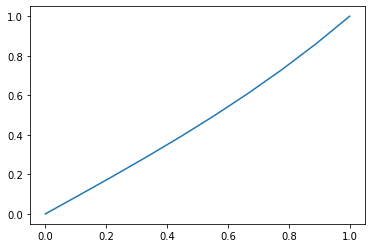

In [20]:
plt.plot(x, appr_sol)

# №5

$$ u_{xx}-x^2u=-(\pi^2/4+xx)cos(x\pi/2) $$
$$ u(0)=1 $$
$$ u(1)=0 $$
$$ analyt = cos(x\pi/2) $$

In [17]:
left_part = lambda x, f1, f2: get_func(f1,'x1',1)(x)*get_func(f2,'x1',1)(x)+x*x*get_func(f1)(x)*get_func(f2)(x)
right_part = lambda x: (pi*pi/4+x*x)*np.cos(x*pi/2)
dirichle_cond = lambda x: 1-x
xl = 0
xr = 1
n_points = 1000
domain = Domain1D(n_points, xl, xr)
fem_obj = FEM_elliptic_eq1D(domain,
                            left_part,
                            right_part,
                            dirichle_cond)
appr_sol = fem_obj.get_solution()
analyt_func = lambda x: np.cos(x*pi/2)
x = domain.get_domain()
analyt_sol = analyt_func(x)
error = np.max(np.abs(appr_sol - analyt_sol))
print(error)

count points: 1000 
count finite elements: 999 
0.00036911905517600374


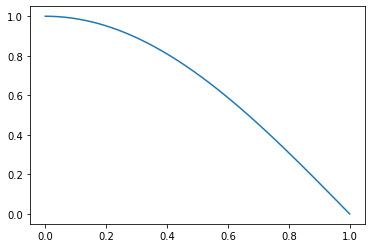

In [18]:
plt.plot(x, appr_sol)